First 5 rows of the dataset:
   Index  Organization Id                     Name  \
0      1  FAB0d41d5b5d22c              Ferrell LLC   
1      2  6A7EdDEA9FaDC52  Mckinney, Riley and Day   
2      3  0bFED1ADAE4bcC1               Hester Ltd   
3      4  2bFC1Be8a4ce42f           Holder-Sellers   
4      5  9eE8A6a4Eb96C24              Mayer Group   

                          Website           Country  \
0              https://price.net/  Papua New Guinea   
1  http://www.hall-buchanan.info/           Finland   
2       http://sullivan-reed.com/             China   
3             https://becker.com/      Turkmenistan   
4          http://www.brewer.com/         Mauritius   

                                      Description  Founded  \
0             Horizontal empowering knowledgebase     1990   
1             User-centric system-worthy leverage     2015   
2                  Switchable scalable moratorium     1971   
3  De-engineered systemic artificial intelligence     2004   
4    

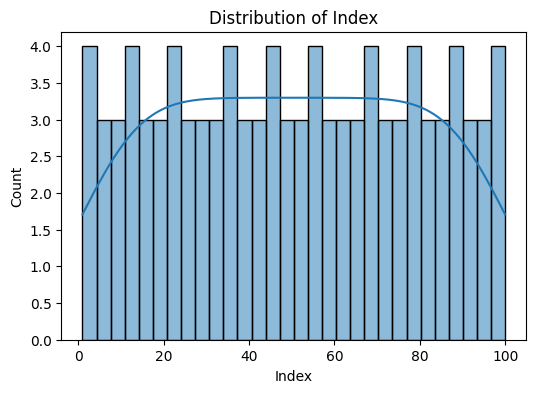

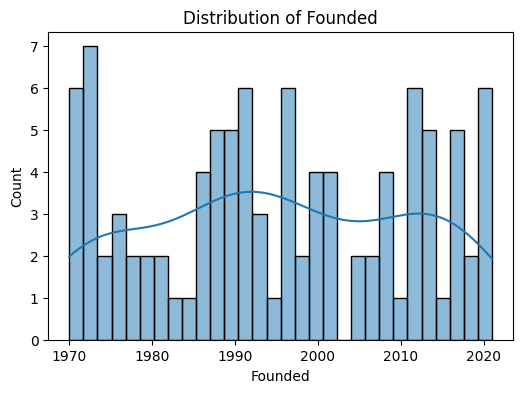

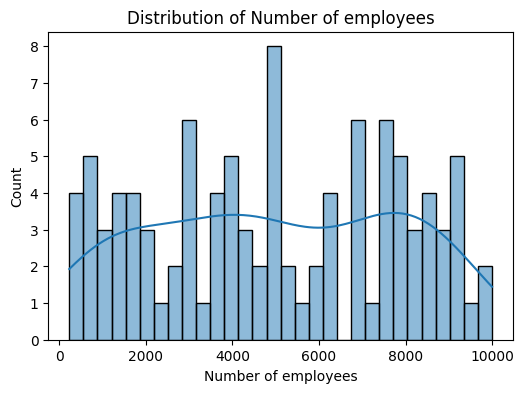

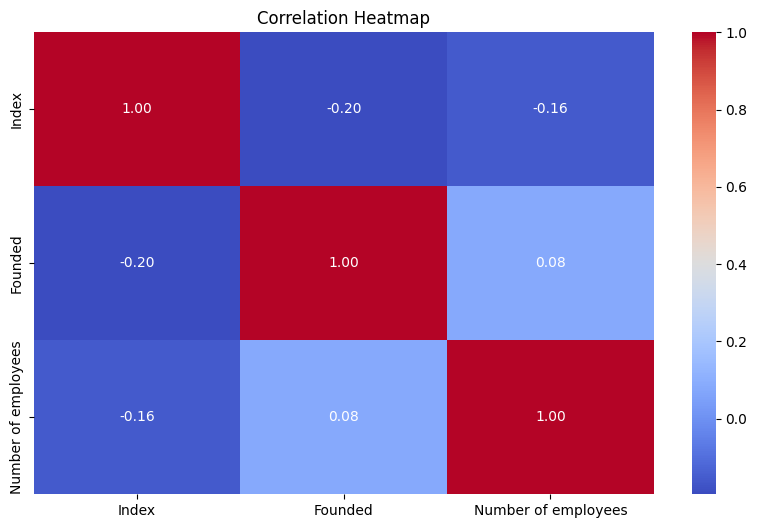


Missing Values after filling:
Index                  0
Organization Id        0
Name                   0
Website                0
Country                0
Description            0
Founded                0
Industry               0
Number of employees    0
dtype: int64
Cleaned dataset saved as 'cleaned_data.csv'.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('organizations-100.csv')

print("First 5 rows of the dataset:")
print(dataset.head())

print("\nDataset Info:")
print(dataset.info())

print("\nStatistical Summary:")
print(dataset.describe())

print("\nMissing Values:")
print(dataset.isnull().sum())

numerical_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


numerical_dataset = dataset.select_dtypes(include=[np.number])


if numerical_dataset.shape[1] > 0:
    correlation_matrix = numerical_dataset.corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numerical columns available for correlation.")

numerical_dataset = dataset.select_dtypes(include=[np.number])
dataset[numerical_dataset.columns] = numerical_dataset.apply(pd.to_numeric, errors='coerce')

dataset[numerical_dataset.columns] = dataset[numerical_dataset.columns].fillna(dataset[numerical_dataset.columns].median())

print("\nMissing Values after filling:")
print(dataset.isnull().sum())

dataset.to_csv('cleaned_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_data.csv'.")